## Çarpımsal Ayrıştırma
- Serideki gözlemlerin sıklığına göre m Hareketli Ortalama hesaplanır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from statsmodels.graphics.tsaplots import month_plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df['year'] = df['Month'].dt.year 
df['month'] = df['Month'].dt.month
df['days'] = df['Month'].dt.days_in_month
df['passengers_per_day'] = df['#Passengers']/df['days']
df.head()

,Month,#Passengers,year,month,days,passengers_per_day
0,1949-01-01,112,1949,1,31,3.612903
1,1949-02-01,118,1949,2,28,4.214286
2,1949-03-01,132,1949,3,31,4.258065
3,1949-04-01,129,1949,4,30,4.300000
4,1949-05-01,121,1949,5,31,3.903226


In [3]:
ma12 = np.empty(df['passengers_per_day'].values.shape)
ma12[:] = np.NaN

ma12[5:-6] = df['passengers_per_day'].rolling(12).mean().iloc[11:].values

ma12x2 = np.empty(df['passengers_per_day'].values.shape)
ma12x2[:] = np.NaN
ma12x2[2:] = pd.DataFrame(ma12).rolling(2).mean().iloc[2:].values.reshape(142,)

df['MA12'] = ma12x2
df.head(10)

,Month,#Passengers,year,month,days,passengers_per_day,MA12
0,1949-01-01,112,1949,1,31,3.612903,NaN
1,1949-02-01,118,1949,2,28,4.214286,NaN
2,1949-03-01,132,1949,3,31,4.258065,NaN
3,1949-04-01,129,1949,4,30,4.300000,NaN
4,1949-05-01,121,1949,5,31,3.903226,NaN
5,1949-06-01,135,1949,6,30,4.500000,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.169201
7,1949-08-01,148,1949,8,31,4.774194,4.185138
8,1949-09-01,136,1949,9,30,4.533333,4.209140
9,1949-10-01,119,1949,10,31,3.838710,4.229570


- Seriyi, Hareketli Ortalama ile hesaplanan yeni seriye **bölerek trendi çıkarılmış seri elde edilir.**

In [4]:
df["detrended"] = df.passengers_per_day / df.MA12
df.head(10)

,Month,#Passengers,year,month,days,passengers_per_day,MA12,detrended
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN
1,1949-02-01,118,1949,2,28,4.214286,NaN,NaN
2,1949-03-01,132,1949,3,31,4.258065,NaN,NaN
3,1949-04-01,129,1949,4,30,4.300000,NaN,NaN
4,1949-05-01,121,1949,5,31,3.903226,NaN,NaN
5,1949-06-01,135,1949,6,30,4.500000,NaN,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.169201,1.145110
7,1949-08-01,148,1949,8,31,4.774194,4.185138,1.140749
8,1949-09-01,136,1949,9,30,4.533333,4.209140,1.077021
9,1949-10-01,119,1949,10,31,3.838710,4.229570,0.907589


- Her mevsim için mevsimsel bileşeni tahmin etmek için, o mevsim için trendden arındırılmış değerlerin ortalamasını almanız yeterlidir. Örneğin, aylık verilerle, Mart ayına ilişkin mevsimsel bileşen, verilerdeki tüm trendi azaltılmış Mart değerlerinin ortalamasıdır. Bu mevsimsel bileşen değerleri daha sonra sıfıra eklenmelerini sağlamak için ayarlanır. Mevsimsel bileşen, bu aylık değerleri bir araya getirerek ve ardından her veri yılı için sırayı tekrarlayarak elde edilir.

In [5]:
seasonal_mean = df.groupby(by="month").mean()[["detrended"]]
seasonal_mean

,detrended
month,
1,0.892365
2,0.950104
3,0.987816
4,0.988893
5,0.962390
6,1.127659
7,1.202657
8,1.196008
9,1.074244


posx and posy should be finite values
posx and posy should be finite values


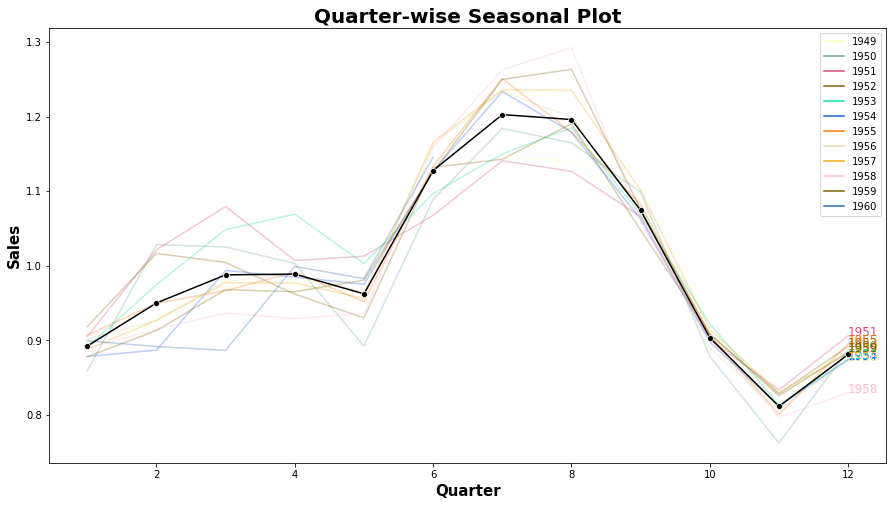

In [6]:
years = df.year.unique()
#line colors
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x="month", y="detrended", hue="year", data=df, palette=list(mycolors), alpha=0.3)
sns.lineplot(x=seasonal_mean.index, y="detrended",data=seasonal_mean, color="black",marker="o",alpha=1)

#line texts
for i, y in enumerate(years):
        ax.text(df.loc[df.year==y].shape[0], df.loc[df.year==y, 'detrended'][-1:].values[0], 
                                                             y, fontsize=12, color=mycolors[i])
        
ax.set_title("Quarter-wise Seasonal Plot", fontsize=20, fontdict={'weight':'bold'})
ax.set_xlabel('Quarter', fontsize = 15, fontdict={'weight':'bold'})
ax.set_ylabel('Sales', fontsize = 15, fontdict={'weight':'bold'})

plt.show()

In [7]:
df["seasonal_mean"] = df["month"].apply(lambda x:seasonal_mean.loc[[x]]["detrended"].values[0])
df.head(13)

,Month,#Passengers,year,month,days,passengers_per_day,MA12,detrended,seasonal_mean
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN,0.892365
1,1949-02-01,118,1949,2,28,4.214286,NaN,NaN,0.950104
2,1949-03-01,132,1949,3,31,4.258065,NaN,NaN,0.987816
3,1949-04-01,129,1949,4,30,4.300000,NaN,NaN,0.988893
4,1949-05-01,121,1949,5,31,3.903226,NaN,NaN,0.962390
5,1949-06-01,135,1949,6,30,4.500000,NaN,NaN,1.127659
6,1949-07-01,148,1949,7,31,4.774194,4.169201,1.145110,1.202657
7,1949-08-01,148,1949,8,31,4.774194,4.185138,1.140749,1.196008
8,1949-09-01,136,1949,9,30,4.533333,4.209140,1.077021,1.074244
9,1949-10-01,119,1949,10,31,3.838710,4.229570,0.907589,0.903605


In [8]:
df["remainder"] = df.detrended / df.seasonal_mean
df.head(10)

,Month,#Passengers,year,month,days,passengers_per_day,MA12,detrended,seasonal_mean,remainder
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN,0.892365,NaN
1,1949-02-01,118,1949,2,28,4.214286,NaN,NaN,0.950104,NaN
2,1949-03-01,132,1949,3,31,4.258065,NaN,NaN,0.987816,NaN
3,1949-04-01,129,1949,4,30,4.300000,NaN,NaN,0.988893,NaN
4,1949-05-01,121,1949,5,31,3.903226,NaN,NaN,0.962390,NaN
5,1949-06-01,135,1949,6,30,4.500000,NaN,NaN,1.127659,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.169201,1.145110,1.202657,0.952150
7,1949-08-01,148,1949,8,31,4.774194,4.185138,1.140749,1.196008,0.953797
8,1949-09-01,136,1949,9,30,4.533333,4.209140,1.077021,1.074244,1.002586
9,1949-10-01,119,1949,10,31,3.838710,4.229570,0.907589,0.903605,1.004409


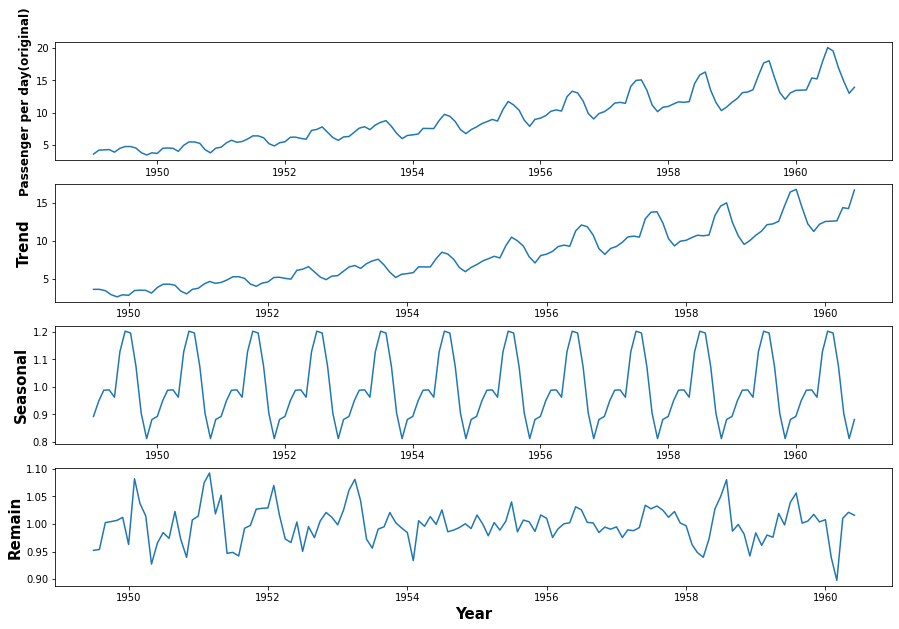

In [9]:
fig, ax = plt.subplots(4,1,figsize=(15, 10))

ax[0].plot(df.Month, df.passengers_per_day)

ax[0].set_ylabel('Passenger per day(original)', fontsize=12, fontdict={'weight':'bold'})

ax[1].plot(df.Month, df.passengers_per_day-df.detrended)

ax[1].set_ylabel('Trend', fontsize=15, fontdict={'weight':'bold'})

ax[2].plot(df.Month, df.seasonal_mean)

ax[2].set_ylabel('Seasonal', fontsize=15, fontdict={'weight':'bold'})

ax[3].plot(df.Month, df.remainder)

ax[3].set_xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
ax[3].set_ylabel('Remain', fontsize=15, fontdict={'weight':'bold'})

plt.show()

- Y eksenindeki değerlere dikkat edin. Mevsimsel iniş çıkışlar göründüğü kadar yüksek değil aslında.

Daha tutarlı bir grafik için y ekseni ölçeğini bütün grafikler için yapalım.

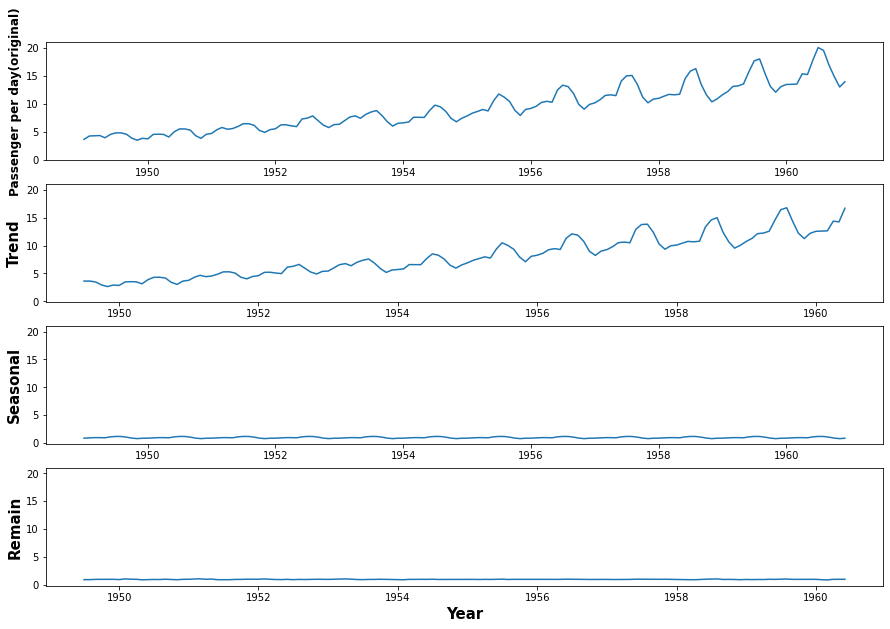

In [10]:
fig, ax = plt.subplots(4,1,figsize=(15, 10), sharey=True)

ax[0].plot(df.Month, df.passengers_per_day)

ax[0].set_ylabel('Passenger per day(original)', fontsize=12, fontdict={'weight':'bold'})

ax[1].plot(df.Month, df.passengers_per_day-df.detrended)

ax[1].set_ylabel('Trend', fontsize=15, fontdict={'weight':'bold'})

ax[2].plot(df.Month, df.seasonal_mean)

ax[2].set_ylabel('Seasonal', fontsize=15, fontdict={'weight':'bold'})

ax[3].plot(df.Month, df.remainder)

ax[3].set_xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
ax[3].set_ylabel('Remain', fontsize=15, fontdict={'weight':'bold'})

plt.show()

### Mevsimsel dalgalanmaların büyüklüğü veya trend bileşeni etrafındaki değişkenlik, zaman serisinin düzeyine göre değişmediği için, toplamsal ayrıştırma en uygunudur.